Equations in MatJax markdown. Cheatsheet here: (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)
Let $x(t)$ be a random variable. The power is $|x(t)|^2$, and the total energy is 
$$E = \int |x(t)|^2 dt$$
The signal $x(t)$ can be expanded in terms of sinusoids of different frequencies using the Fourier transform:
$$ x(t) = {1\over {\sqrt{2 \pi}}} \int x(\omega) e^{-i \omega t}d\omega $$
Conversely, the Fourier transform of the signal is
$$ x(\omega) = {1\over {\sqrt{2 \pi}}} \int x(t) e^{i \omega t}dt $$
$x(t)$ is the signal in the time domain. $x(\omega)$ is the signal in the frequency domain. The power spectrum is

$$ S(\omega) = |x(\omega)|^2 $$


By Parseval's theorem:
$$E = \int |x(\omega)|^2 d\omega$$

power from x(t) $ 4.976409712679036
noise power $ 4.976307542007599


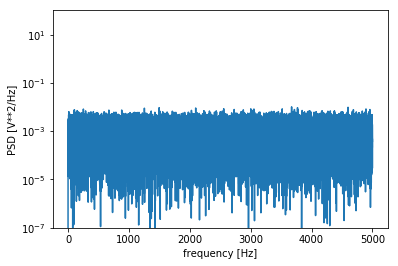

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 10e3 # sampling frequency in Hz
N = 1e5 # # of points
noise_power = 0.001 * fs / 2
#print('noise power specified $', noise_power)
time = np.arange(N) / fs # time points
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape) # Gaussian white noise
print('power from x(t) $', np.mean(noise*noise))

# calculating the power spectral density
f, Pxx_den = signal.periodogram(noise, fs, scaling='density')
print('noise power $', np.mean(Pxx_den)*np.max(f))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Now we embed a sinusoidal signal $ x_s = sin(\theta) $. The mean square amplitude is  

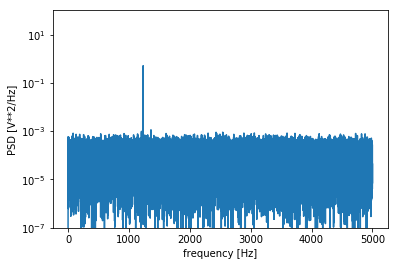

power in sine, rms ampliture 0.7149077825446466


In [2]:

amp = 2*np.sqrt(2)
freq1 = 1234.0
x = np.sin(2*np.pi*freq1*time) # sinusoidal signal
x += noise # add noise

# calculating the power spectrum
f, Pxx_den = signal.periodogram(x, fs, scaling='spectrum')
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2]')
plt.show()

print('power in sine, rms ampliture', np.sqrt(Pxx_den.max()))

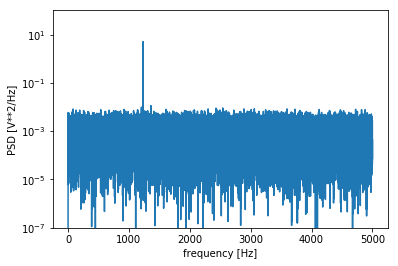

power in sine, rms ampliture 2.2607369098214494


In [3]:
f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

print('power in sine, rms ampliture', np.sqrt(Pxx_den.max()))